In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import time

## Import Dataset

In [350]:
train = pd.read_csv('dataset/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [351]:
test_1 = pd.read_csv('dataset/test.csv')
test_1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [352]:
test_2 = pd.read_csv("E:\Data Science Bootcamp\DS_W1\A1\dataset\gender_submission.csv")
test_2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Data Cleaning

In [ ]:
def preprocess_dataset(data, flag):
    # Display basic statistics and null value counts
    print("Data Description: ")
    print(data.describe())

    # Calculate and display the percentage of missing values for specific columns
    a = round((data['Cabin'].isnull().sum() / len(data)) * 100, 2)
    b = round((data['Age'].isnull().sum() / len(data)) * 100, 2)
    c = round((data['Fare'].isnull().sum() / len(data)) * 100, 2)
    d = round((data['Embarked'].isnull().sum() / len(data)) * 100, 2)
    print("*"*30)
    print(f'{a} % of "Cabin" records are null')
    print(f'{b} % of "Age" records are null')
    print(f'{c} % of "Fare" records are null')
    print(f'{d} % of "Embarked" records are null')

    # Drop 'Cabin' column as it has too many missing values
    data.drop('Cabin', axis=1, inplace=True)

    # Fill missing 'Age' values with the mean
    data['Age'].fillna(data['Age'].mean(), inplace=True)

    # Drop rows with any other missing values
    data.dropna(inplace=True)

    # Drop 'Name' and 'Ticket' columns due to too many unique values
    data.drop(['Name', 'Ticket'], axis=1, inplace=True)

    
    # Display number of unique values for specific columns
    print(f'Sex attribute has {data["Sex"].nunique()} unique values')
    print(f'Embarked attribute has {data["Embarked"].nunique()} unique values')

    # Apply Label Encoding for 'Sex' and One-Hot Encoding for 'Embarked'
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    le= LabelEncoder()
    data['Embarked'] = le.fit_transform(data['Embarked'])

    if flag == True:
        X = data.drop(columns=['PassengerId', 'Survived'])
        Y = data['Survived']
        return X, Y
    
    X = data.drop(columns=['PassengerId'])
    return X


### Training Data Cleaning

In [354]:
# Training data has output label
train_X, train_Y = preprocess_dataset(train, True)

Data Description: 
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]
******************************
77.1 % of "Cabin" records are null
19.87 % of "Age" records are null
0.0 % of "Fare" records are null
0.22 % of "Embarked" records are null
Sex attribute has 2 unique value

C:\Users\HP\AppData\Local\Temp\ipykernel_22280\2403253377.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


0.22 % of "Embarked" records are null
Sex attribute has 2 values
Embarked attribute has 3 values

In [355]:
train_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,2
1,1,1,38.000000,1,0,71.2833,0
2,3,1,26.000000,0,0,7.9250,2
3,1,1,35.000000,1,0,53.1000,2
4,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,2
887,1,1,19.000000,0,0,30.0000,2
888,3,1,29.699118,1,2,23.4500,2
889,1,0,26.000000,0,0,30.0000,0


### Testing Data Cleaning

In [356]:
test_1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [357]:
test_X = preprocess_dataset(test_1, False)

Data Description: 
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
******************************
78.23 % of "Cabin" records are null
20.57 % of "Age" records are null
0.24 % of "Fare" records are null
0.0 % of "Embarked" records are null
Sex attribute has 2 unique values
Embarked attribute has 3 unique values


C:\Users\HP\AppData\Local\Temp\ipykernel_22280\2403253377.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [358]:
test_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,1
1,3,1,47.00000,1,0,7.0000,2
2,2,0,62.00000,0,0,9.6875,1
3,3,0,27.00000,0,0,8.6625,2
4,3,1,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,2
414,1,1,39.00000,0,0,108.9000,0
415,3,0,38.50000,0,0,7.2500,2
416,3,0,30.27259,0,0,8.0500,2


## Exploratory Data Analysis

In [359]:
def plot_eda(X, Y=None, flag=None):
    """
    Function to perform EDA plots for the dataset, assuming the target column is in a separate dataframe.
    
    Arguments:
    X : pandas.DataFrame : The features of the dataset.
    Y : pandas.Series : The target 'Survived' column.
    """
    
    # Plotting Age Distribution
    plt.figure(figsize=(7, 4))
    sns.histplot(X['Age'], bins=30)
    plt.title("Age Distribution")
    plt.show()

    # Plotting Fare Distribution
    plt.figure(figsize=(7, 4))
    sns.histplot(X['Fare'], bins=30)
    plt.title("Fare Distribution")
    plt.show()

    # Adding 'Survived' back to the features dataframe (X) for train dataset
    if flag == True:
        X['Survived'] = Y
    
        # Plotting Class vs Survived
        plt.figure(figsize=(7, 4))
        sns.countplot(x='Pclass', hue='Survived', data=X)
        plt.title("Class vs Survived")
        plt.xlabel("Pclass")
        plt.ylabel("Survived")
        plt.show()

        # Plotting Survived vs Sex
        plt.figure(figsize=(7, 4))
        sns.countplot(x='Sex', hue='Survived', data=X)
        plt.title('Survived vs Sex')
        plt.show()

        # Plotting Survived vs Embarked
        plt.figure(figsize=(7, 4))
        sns.countplot(x='Embarked', hue='Survived', data=X)
        plt.title('Survived vs Embarked')
        plt.show()

        # Plotting Count of Survived
        plt.figure(figsize=(7, 4))
        sns.countplot(x="Survived", data=X)
        plt.title('Count of Survived vs Not Survived')
        plt.show()

    # Plotting Correlation Matrix
    correlation_matrix = X.corr()

    plt.figure(figsize=(10, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=False)
    plt.title("Correlation Matrix")
    plt.xticks(rotation=45)
    plt.show()

### EDA of Training dataset

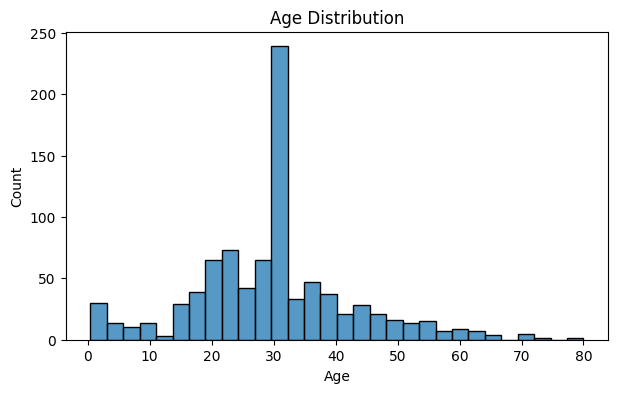

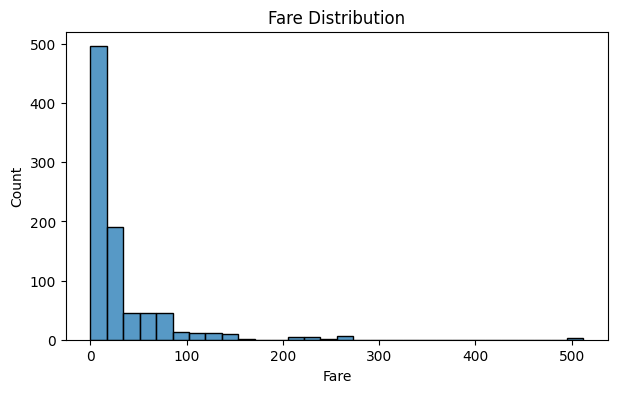

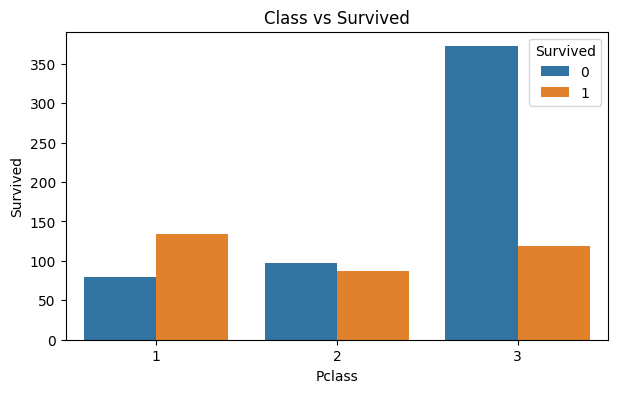

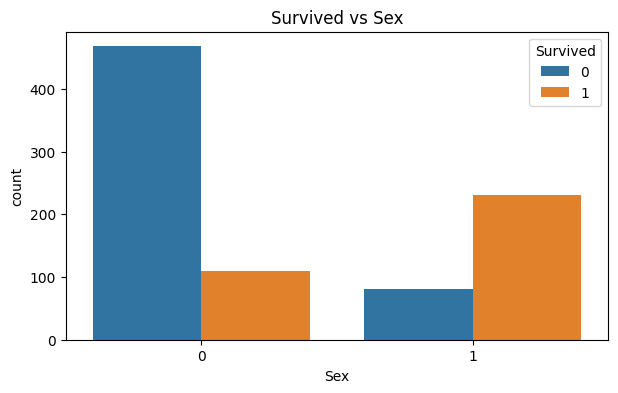

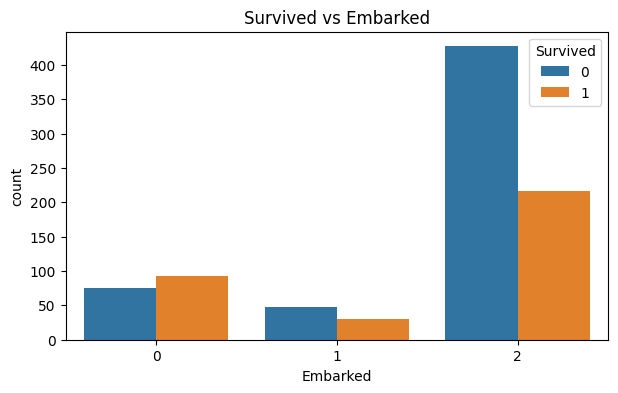

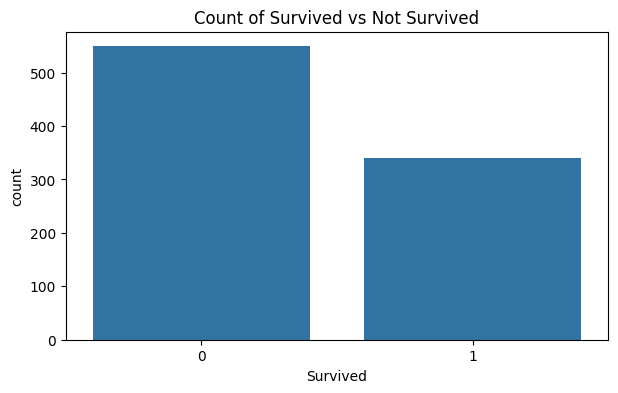

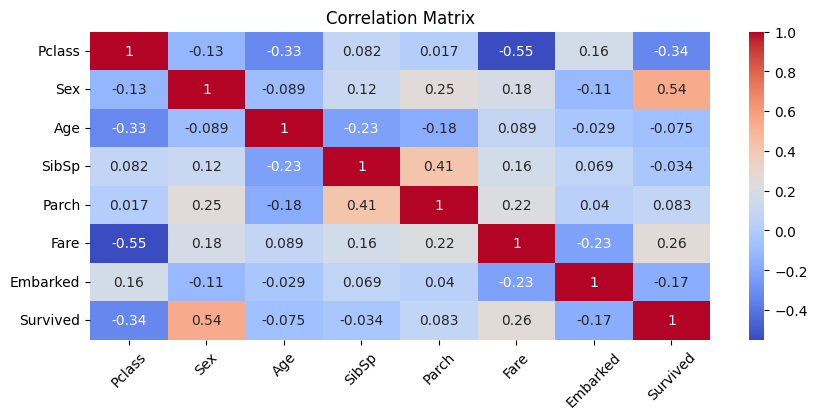

In [360]:
plot_eda(train_X, train_Y, True)

### EDA of Testing dataset

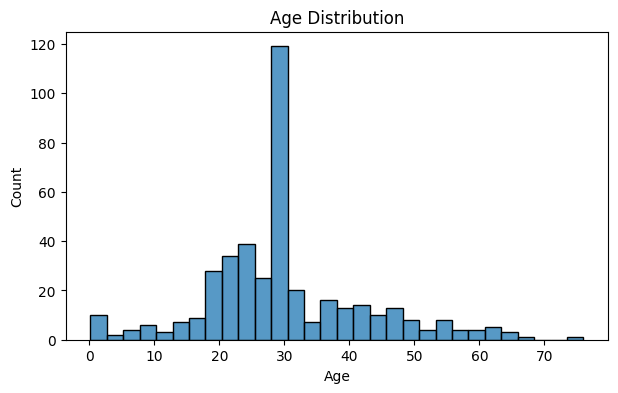

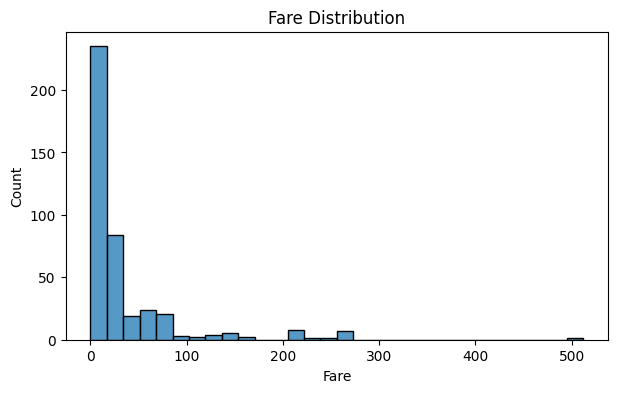

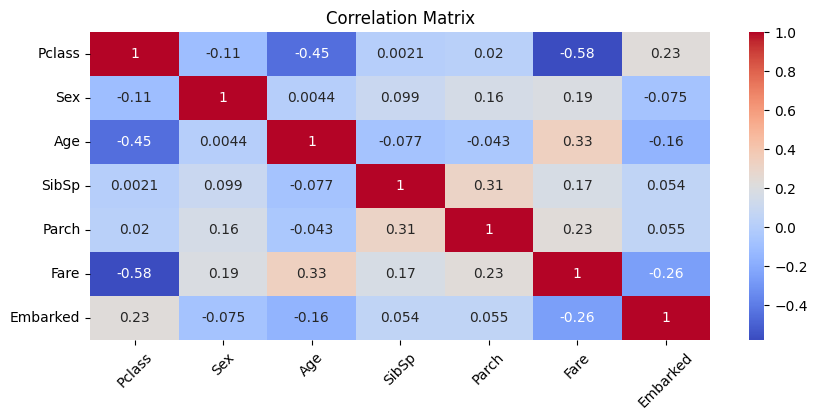

In [361]:
plot_eda(test_X, False)

## Machine Learning Modeling

In [362]:
train_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.000000,1,0,7.2500,2,0
1,1,1,38.000000,1,0,71.2833,0,1
2,3,1,26.000000,0,0,7.9250,2,1
3,1,1,35.000000,1,0,53.1000,2,1
4,3,0,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,2,0
887,1,1,19.000000,0,0,30.0000,2,1
888,3,1,29.699118,1,2,23.4500,2,0
889,1,0,26.000000,0,0,30.0000,0,1


In [363]:
train_X.drop(columns=["Survived"], inplace=True)
train_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,2
1,1,1,38.000000,1,0,71.2833,0
2,3,1,26.000000,0,0,7.9250,2
3,1,1,35.000000,1,0,53.1000,2
4,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,2
887,1,1,19.000000,0,0,30.0000,2
888,3,1,29.699118,1,2,23.4500,2
889,1,0,26.000000,0,0,30.0000,0


In [ ]:
# Define models and their respective parameter grids
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'Logistic Regression': {
        'penalty': ['l1', 'l2'],  
    },
    'SVC': {
        'kernel': ['linear', 'rbf'],  
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7]
    }
}

results = {}

# Loop over models and perform grid search
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Set up GridSearchCV - GridSearchSV evalute model on training data with matric accuracy
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(train_X, train_Y)
    
    # Store the results
    results[model_name] = grid_search


Training Logistic Regression...
Training SVC...
Training Random Forest...
Training KNN...


In [366]:
for model_name, grid_search in results.items():
    print(f"\nResults for {model_name}:")
    df = pd.DataFrame(grid_search.cv_results_)
    
    # Display the best parameters, mean test score, and mean fit time, sorted by the test score
    df_sorted = df[['params', 'mean_test_score', 'mean_fit_time']].sort_values(by='mean_test_score', ascending=False)
    print(df_sorted)
    
    # Print the best cross-validation score for the model
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")
    
    # Print the best parameters for the model
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print("-" * 50)


Results for Logistic Regression:
              params  mean_test_score  mean_fit_time
1  {'penalty': 'l2'}         0.791938       0.011103
0  {'penalty': 'l1'}         0.786320       0.014950
Best cross-validation score for Logistic Regression: 0.7919380435472609
Best parameters for Logistic Regression: {'penalty': 'l2'}
--------------------------------------------------

Results for SVC:
                 params  mean_test_score  mean_fit_time
0  {'kernel': 'linear'}         0.787399       6.719495
1     {'kernel': 'rbf'}         0.673808       0.034824
Best cross-validation score for SVC: 0.7873992255443407
Best parameters for SVC: {'kernel': 'linear'}
--------------------------------------------------

Results for Random Forest:
                                   params  mean_test_score  mean_fit_time
5  {'max_depth': 10, 'n_estimators': 200}         0.830172       1.065062
4  {'max_depth': 10, 'n_estimators': 100}         0.826801       0.507717
3   {'max_depth': 10, 'n_estimators'

In [367]:
for model_name, result in results.items():
    print(f"\nResults for {model_name}:")
    df = pd.DataFrame(result.cv_results_)
    
    # Display the best parameters, mean test score, and mean fit time, sorted by the test score
    print(df[['params', 'mean_test_score', 'mean_fit_time']].sort_values(by='mean_test_score', ascending=False))
    print("-" * 50)



Results for Logistic Regression:
              params  mean_test_score  mean_fit_time
1  {'penalty': 'l2'}         0.791938       0.011103
0  {'penalty': 'l1'}         0.786320       0.014950
--------------------------------------------------

Results for SVC:
                 params  mean_test_score  mean_fit_time
0  {'kernel': 'linear'}         0.787399       6.719495
1     {'kernel': 'rbf'}         0.673808       0.034824
--------------------------------------------------

Results for Random Forest:
                                   params  mean_test_score  mean_fit_time
5  {'max_depth': 10, 'n_estimators': 200}         0.830172       1.065062
4  {'max_depth': 10, 'n_estimators': 100}         0.826801       0.507717
3   {'max_depth': 10, 'n_estimators': 50}         0.823418       0.217291
0    {'max_depth': 5, 'n_estimators': 50}         0.820060       0.286358
6   {'max_depth': 15, 'n_estimators': 50}         0.820041       0.238049
8  {'max_depth': 15, 'n_estimators': 200}      

Results for Random Forest with max_depth 10 and n_estimators 200 performs better on training dataset as compared to other models